In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
df = pd.read_csv(r'c:\Users\1\Documents\symbolic_regression_capstone\data\metaG_kegg9025_AND_environmentalData47_CLEAN.csv')

# Basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns.tolist()[:20])  # Show first 20 columns
print(f"... and {len(df.columns) - 20} more columns")

# Display basic statistics
print("\nDataset Info:")
print(f"- Number of samples: {df.shape[0]}")
print(f"- Total number of features: {df.shape[1]}")

# Check for missing values
print(f"\nMissing values: {df.isnull().sum().sum()}")
print(f"Missing value percentage: {(df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100:.2f}%")

Dataset Shape: (72, 9066)

Column Names:
['PANGAEA_sample_id', 'TSC_NAME', 'Matched_PANGAEA_sample_id', 'metaTranscriptomes_id', 'Station.label', 'Event.date', 'Year', 'Month', 'Province', 'Ocean.name', 'Layer', 'Polarity', 'Oxygen', 'Temperature', 'Salinity', 'Latitude', 'Si', 'Density', 'NO3', 'NO2...NO3']
... and 9046 more columns

Dataset Info:
- Number of samples: 72
- Total number of features: 9066

Missing values: 5053
Missing value percentage: 0.77%


In [28]:
# Examine the structure of the data more closely
print("First few rows of the dataset:")
print(df.head())

print("\nData types:")
print(df.dtypes.value_counts())

First few rows of the dataset:
  PANGAEA_sample_id TSC_NAME        Matched_PANGAEA_sample_id  \
0   TARA_A100000164   TSC008  TARA_A100000164-TARA_A100000165   
1   TARA_A100001015   TSC020           No_Matched_metaT_metaG   
2   TARA_A200000113   TSC003           No_Matched_metaT_metaG   
3   TARA_E500000075   TSC013           No_Matched_metaT_metaG   
4   TARA_E500000178   TSC016           No_Matched_metaT_metaG   

           metaTranscriptomes_id Station.label        Event.date  Year  Month  \
0                TARA_A100000165      TARA_018  2009-11-02T08:13  2009     11   
1  without_matched_transcriptome      TARA_030  2009-12-15T10:41  2009     12   
2  without_matched_transcriptome      TARA_007  2009-09-23T12:50  2009      9   
3  without_matched_transcriptome      TARA_023  2009-11-18T08:41  2009     11   
4  without_matched_transcriptome      TARA_025  2009-11-23T09:12  2009     11   

  Province          Ocean.name  ... K22754    K22755    K22757    K22761  \
0       B7  Med

In [29]:
# Identify different types of columns based on naming patterns
meta_cols = [col for col in df.columns if not col.startswith('K')]
kegg_cols = [col for col in df.columns if col.startswith('K')]

print(f"Metadata columns ({len(meta_cols)}):")
print(meta_cols)

print(f"\nKEGG feature columns: {len(kegg_cols)} (showing first 20)")
print(kegg_cols[:20])

Metadata columns (42):
['PANGAEA_sample_id', 'TSC_NAME', 'Matched_PANGAEA_sample_id', 'metaTranscriptomes_id', 'Station.label', 'Event.date', 'Year', 'Month', 'Province', 'Ocean.name', 'Layer', 'Polarity', 'Oxygen', 'Temperature', 'Salinity', 'Latitude', 'Si', 'Density', 'NO3', 'NO2...NO3', 'PO4', 'Depth.nominal', 'Longitude', 'HCO3', 'ChlorophyllA', 'Iron.5m', 'Depth.Max.O2', 'Fluorescence', 'CO3', 'Mean.Flux.at.150m', 'NO2', 'NPP.8d.VGPM..mgC.m2.day.', 'Brunt.Väisälä', 'Lyapunov', 'Nitracline', 'Depth.Mixed.Layer', 'Ammonium.5m', 'Depth.Min.O2', 'Okubo.Weiss', 'Carbon.total', 'Alkalinity.total', 'Gradient.Surface.temp.SST.']

KEGG feature columns: 9024 (showing first 20)
['K00002', 'K00003', 'K00004', 'K00005', 'K00006', 'K00007', 'K00008', 'K00009', 'K00010', 'K00011', 'K00012', 'K00013', 'K00014', 'K00015', 'K00016', 'K00018', 'K00019', 'K00020', 'K00021', 'K00022']


In [30]:
# Analyze the environmental/metadata variables
print("Environmental/Metadata Variables Summary:")
print(df[meta_cols].describe())

Environmental/Metadata Variables Summary:
              Year      Month     Oxygen  Temperature   Salinity   Latitude  \
count    72.000000  72.000000  72.000000    72.000000  72.000000  72.000000   
mean   2011.291667   7.458333   0.555441    -0.428415  -0.269486   0.742141   
std       1.706966   2.505979   0.974303     1.174803   1.424311   1.009188   
min    2009.000000   3.000000  -2.544265    -1.850415  -6.070614  -1.235121   
25%    2010.000000   6.000000  -0.176526    -1.532508  -0.540399   0.085125   
50%    2010.000000   7.000000   0.187845    -0.858910  -0.086420   0.816204   
75%    2013.000000   9.000000   1.498021     0.799308   0.521497   1.625563   
max    2013.000000  12.000000   2.223478     1.482872   2.167453   1.797341   

              Si    Density        NO3  NO2...NO3  ...  Brunt.Väisälä  \
count  72.000000  72.000000  72.000000  72.000000  ...      72.000000   
mean   -0.213680   0.129489  -0.277177  -0.348133  ...      -0.252842   
std     0.586698   1.156348

In [31]:
# Analyze KEGG gene abundance data
kegg_data = df[kegg_cols]
print("KEGG Gene Abundance Data Summary:")
print(f"Shape: {kegg_data.shape}")
print(f"Min value: {kegg_data.min().min()}")
print(f"Max value: {kegg_data.max().max()}")
print(f"Mean abundance: {kegg_data.mean().mean():.6f}")
print(f"Number of zero values: {(kegg_data == 0).sum().sum()}")
print(f"Percentage of zero values: {((kegg_data == 0).sum().sum() / (kegg_data.shape[0] * kegg_data.shape[1])) * 100:.2f}%")

KEGG Gene Abundance Data Summary:
Shape: (72, 9024)
Min value: 0.0
Max value: 7.12791452232069
Mean abundance: 0.096852
Number of zero values: 139318
Percentage of zero values: 21.44%


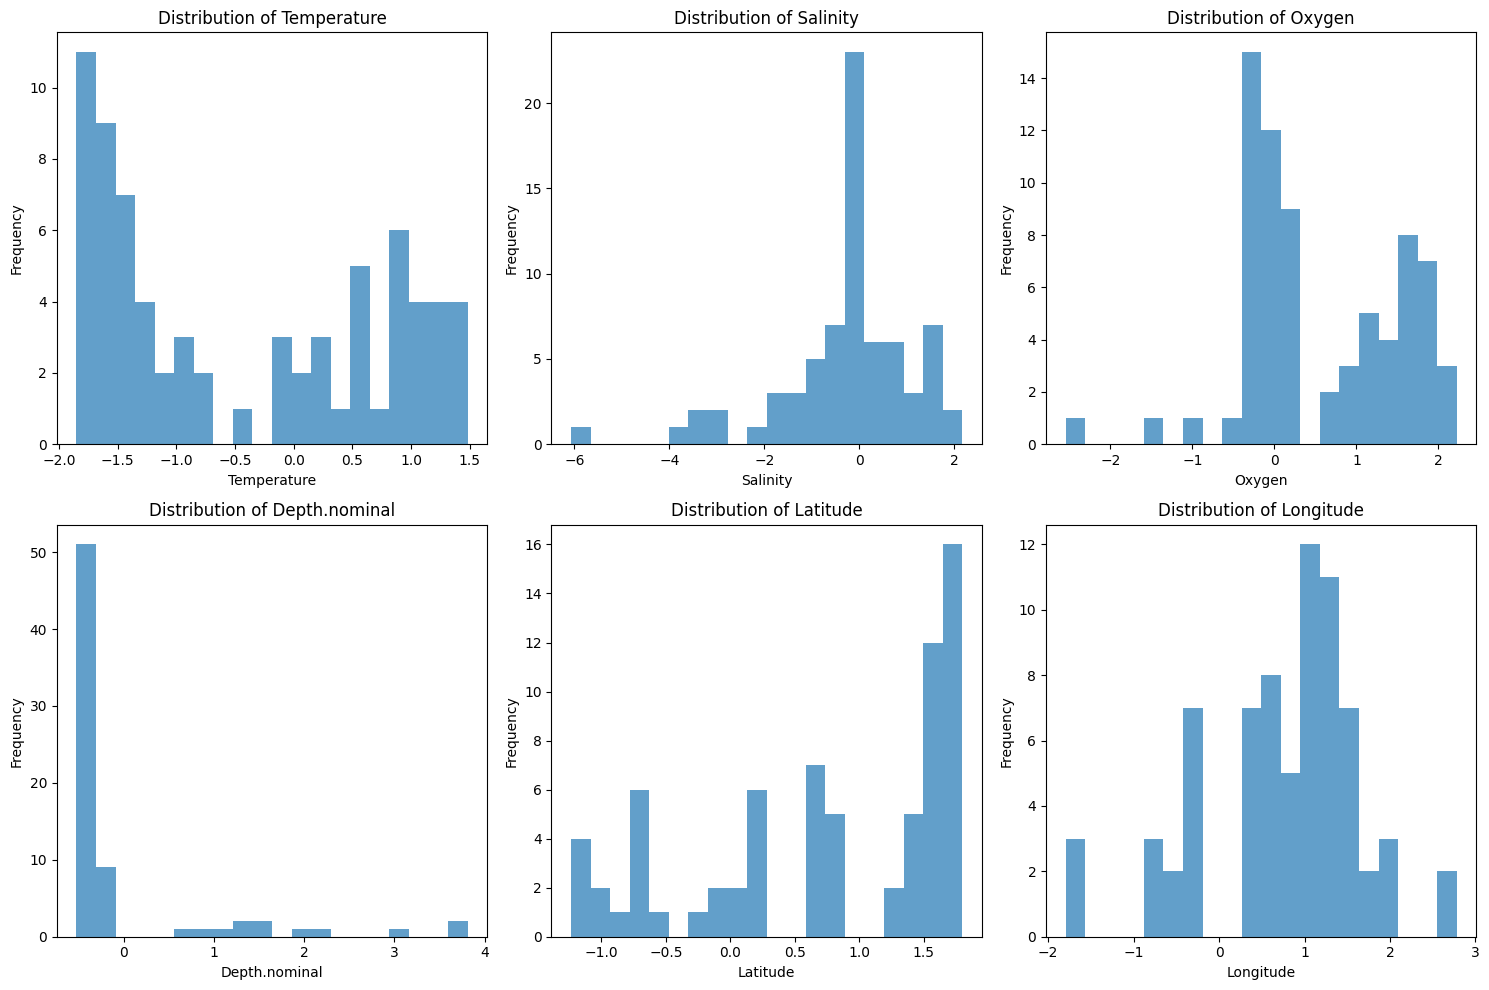

In [32]:
# Visualize the distribution of some key environmental variables
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

env_vars_to_plot = ['Temperature', 'Salinity', 'Oxygen', 'Depth.nominal', 'Latitude', 'Longitude']

for i, var in enumerate(env_vars_to_plot):
    if var in df.columns:
        axes[i].hist(df[var].dropna(), bins=20, alpha=0.7)
        axes[i].set_title(f'Distribution of {var}')
        axes[i].set_xlabel(var)
        axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

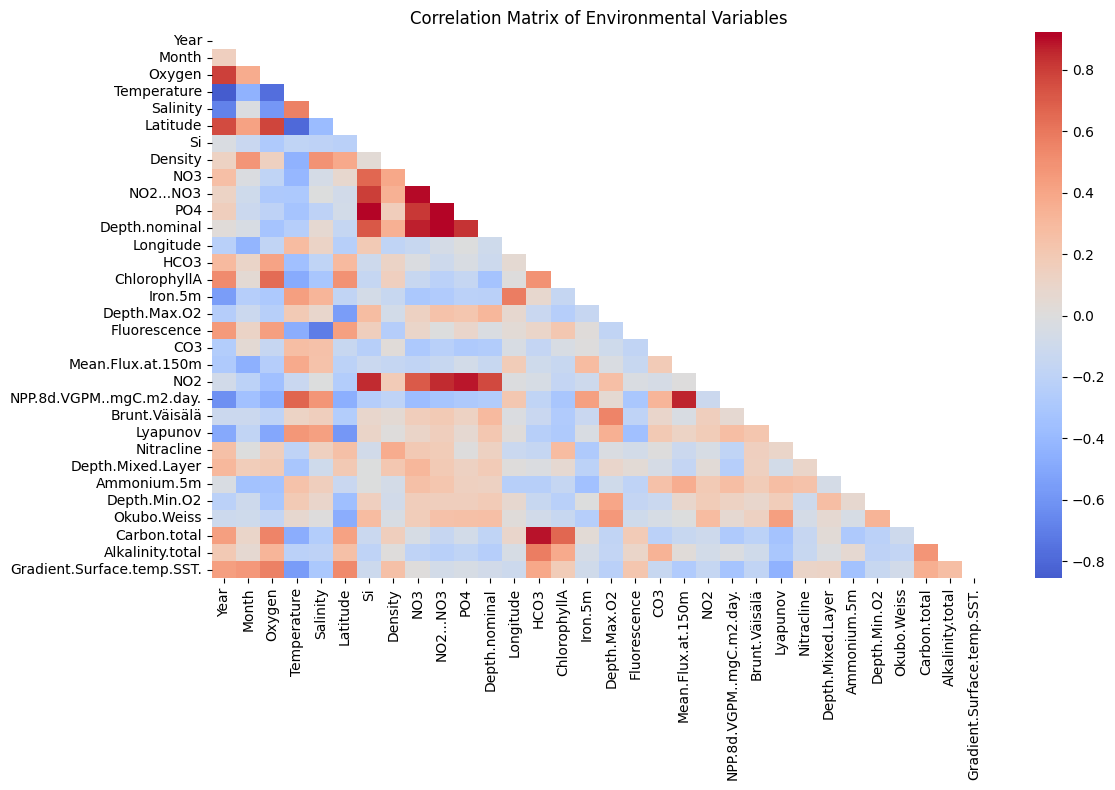

In [33]:
# Examine correlations between environmental variables
env_numeric = df[meta_cols].select_dtypes(include=[np.number])
correlation_matrix = env_numeric.corr()

plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(correlation_matrix))
sns.heatmap(correlation_matrix, mask=mask, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Environmental Variables')
plt.tight_layout()
plt.show()

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------
# load (auto-detect gzip)
# ---------------------------
df = pd.read_csv(
    "c:/Users/1/Documents/symbolic_regression_capstone/data/metaG_kegg9025_AND_environmentalData47_CLEAN.csv",  # absolute path
    sep=",",
)

# ---------------------------
# 1) Safe row / column counts
# ---------------------------
# Compute lengths per partition and sum them (works reliably)
n_rows = len(df)
n_cols = len(df.columns)

print(f"Rows: {n_rows:,}, Columns: {n_cols}")

# ---------------------------
# 2) Column overview / non-missing counts
# ---------------------------
print("\nColumns:", list(df.columns))

# ---------------------------
# 3) Categories
# ---------------------------

years = df["Year"].value_counts(dropna=False)
print("\nYears:\n", years)

oceans = df["Ocean.name"].value_counts(dropna=False)
print("\nOceans:\n", oceans)

layers = df["Layer"].value_counts(dropna=False)
print("\nLayers:\n", layers)

polarities = df["Polarity"].value_counts(dropna=False)
print("\nLayers:\n", polarities)




Rows: 72, Columns: 9066

Columns: ['PANGAEA_sample_id', 'TSC_NAME', 'Matched_PANGAEA_sample_id', 'metaTranscriptomes_id', 'Station.label', 'Event.date', 'Year', 'Month', 'Province', 'Ocean.name', 'Layer', 'Polarity', 'Oxygen', 'Temperature', 'Salinity', 'Latitude', 'Si', 'Density', 'NO3', 'NO2...NO3', 'PO4', 'Depth.nominal', 'Longitude', 'HCO3', 'ChlorophyllA', 'Iron.5m', 'Depth.Max.O2', 'Fluorescence', 'CO3', 'Mean.Flux.at.150m', 'NO2', 'NPP.8d.VGPM..mgC.m2.day.', 'Brunt.Väisälä', 'Lyapunov', 'Nitracline', 'Depth.Mixed.Layer', 'Ammonium.5m', 'Depth.Min.O2', 'Okubo.Weiss', 'Carbon.total', 'Alkalinity.total', 'Gradient.Surface.temp.SST.', 'K00002', 'K00003', 'K00004', 'K00005', 'K00006', 'K00007', 'K00008', 'K00009', 'K00010', 'K00011', 'K00012', 'K00013', 'K00014', 'K00015', 'K00016', 'K00018', 'K00019', 'K00020', 'K00021', 'K00022', 'K00023', 'K00024', 'K00025', 'K00026', 'K00027', 'K00028', 'K00029', 'K00030', 'K00031', 'K00033', 'K00034', 'K00035', 'K00036', 'K00038', 'K00039', 'K00

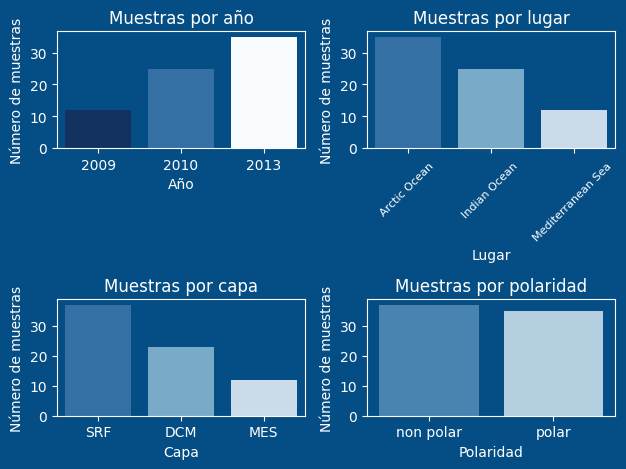

In [42]:
fig, ax = plt.subplots(ncols=2, nrows=2)
fig.patch.set_facecolor('#044E85')

# Top left: Samples by year
sns.barplot(x=years.index, y=years.values, hue=years.index, ax=ax[0, 0], palette="Blues_r", legend=False)
ax[0, 0].set_title("Muestras por año", color='white')
ax[0, 0].set_xlabel("Año", color='white')
ax[0, 0].set_ylabel("Número de muestras", color='white')
ax[0, 0].tick_params(colors='white')

# Top right: Samples by ocean
sns.barplot(x=oceans.index, y=oceans.values, hue=oceans.index, ax=ax[0, 1], palette="Blues_r", legend=False)
ax[0, 1].set_title("Muestras por lugar", color='white')
ax[0, 1].set_xlabel("Lugar", color='white')
ax[0, 1].set_ylabel("Número de muestras", color='white')
ax[0, 1].tick_params(colors='white', axis='x', labelsize=8, rotation=45)
ax[0, 1].tick_params(colors='white', axis='y')

# Bottom left: Samples by layer
sns.barplot(x=layers.index, y=layers.values, hue=layers.index, ax=ax[1, 0], palette="Blues_r", legend=False)
ax[1, 0].set_title("Muestras por capa", color='white')
ax[1, 0].set_xlabel("Capa", color='white')
ax[1, 0].set_ylabel("Número de muestras", color='white')
ax[1, 0].tick_params(colors='white')

# Bottom right: Samples by polarity
sns.barplot(x=polarities.index, y=polarities.values, hue=polarities.index, ax=ax[1, 1], palette="Blues_r", legend=False)
ax[1, 1].set_title("Muestras por polaridad", color='white')
ax[1, 1].set_xlabel("Polaridad", color='white')
ax[1, 1].set_ylabel("Número de muestras", color='white')
ax[1, 1].tick_params(colors='white')

for a in ax.ravel():
    a.set_facecolor('#044E85')
    for spine in a.spines.values():
        spine.set_color('white')

fig.tight_layout()
plt.show()

Available carbon pump variables: ['Temperature', 'CO3', 'Carbon.total', 'ChlorophyllA', 'Oxygen', 'NO3']


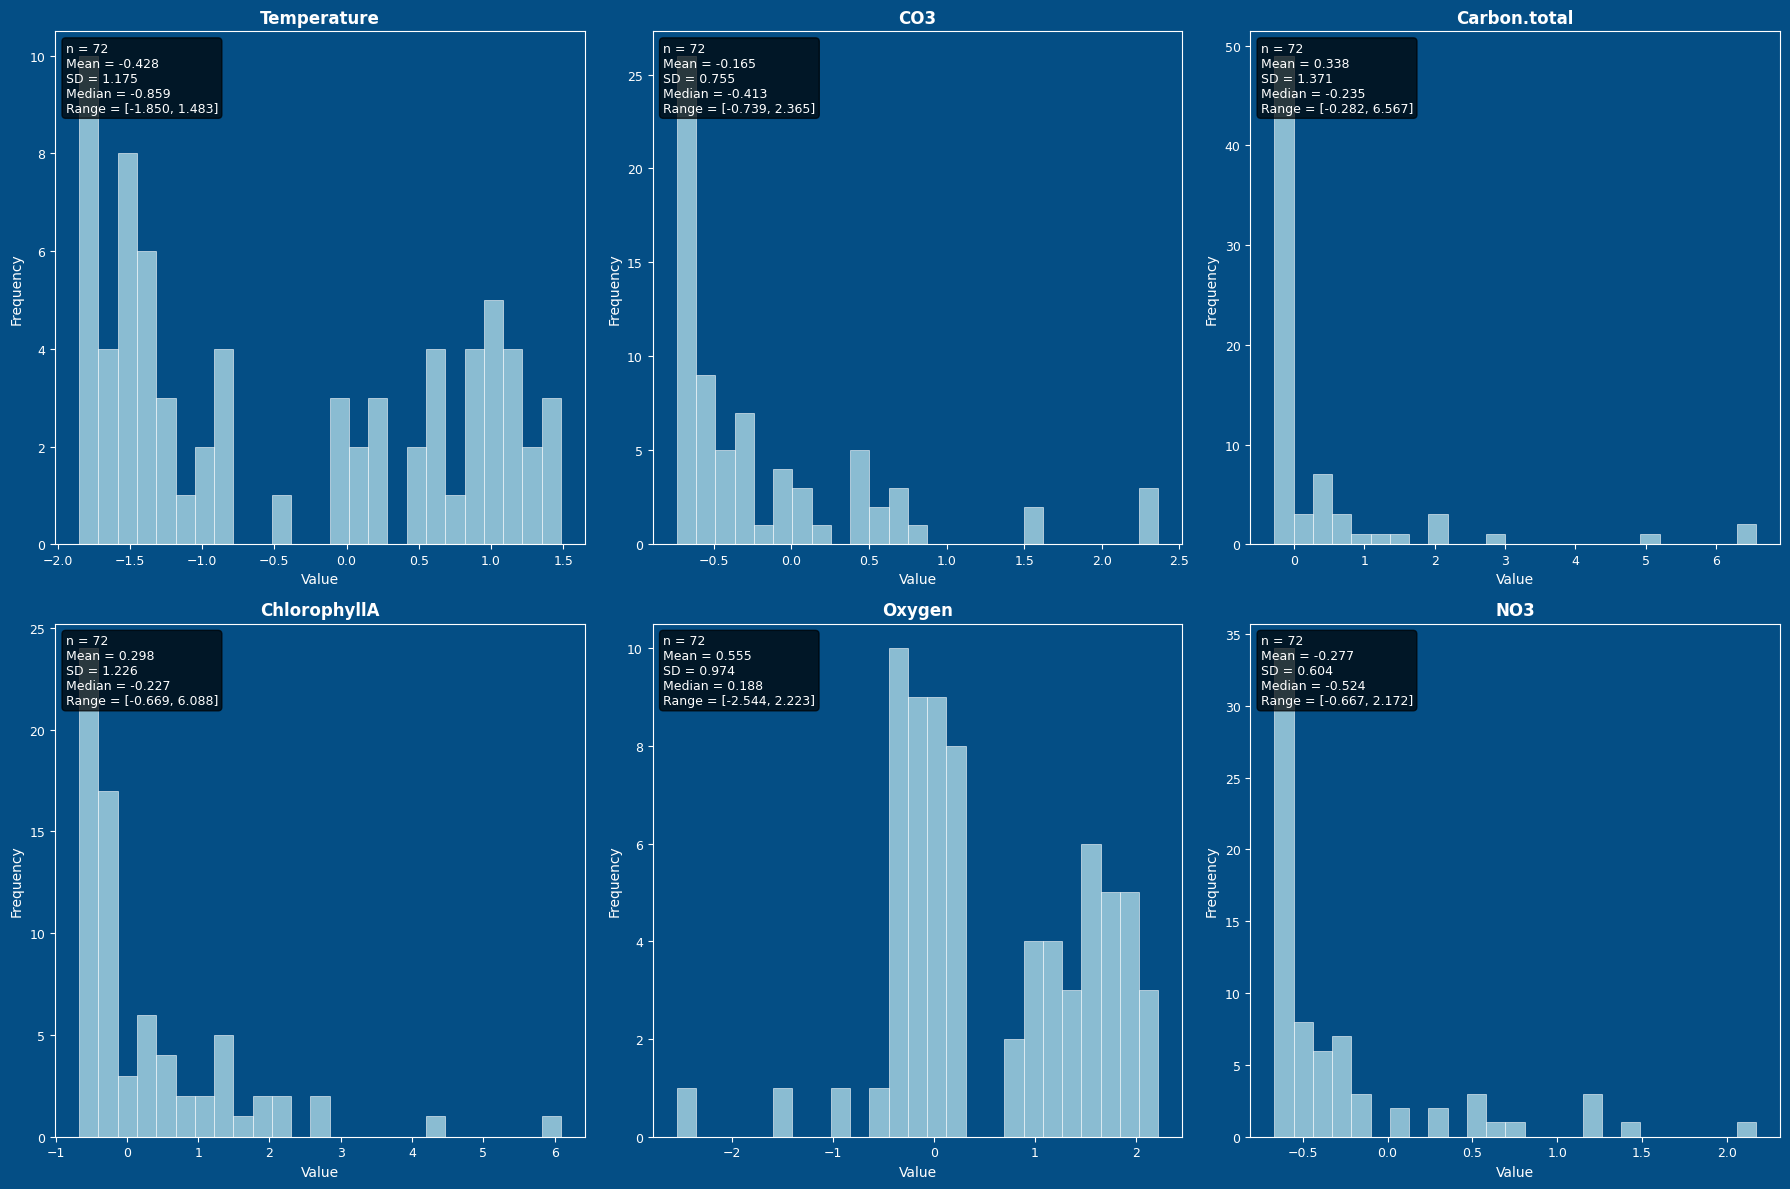


Carbon Pump Environmental Variables - Summary Statistics:
       Temperature      CO3  Carbon.total  ChlorophyllA   Oxygen      NO3
count      72.0000  72.0000       72.0000       72.0000  72.0000  72.0000
mean       -0.4284  -0.1649        0.3378        0.2983   0.5554  -0.2772
std         1.1748   0.7546        1.3710        1.2259   0.9743   0.6043
min        -1.8504  -0.7387       -0.2815       -0.6685  -2.5443  -0.6673
25%        -1.5325  -0.6846       -0.2618       -0.4539  -0.1765  -0.6602
50%        -0.8589  -0.4130       -0.2349       -0.2268   0.1878  -0.5244
75%         0.7993   0.1218        0.4134        0.6856   1.4980  -0.2530
max         1.4829   2.3649        6.5668        6.0875   2.2235   2.1720


In [44]:
# Select 6 key environmental variables for ocean carbon pump modeling
carbon_pump_vars = [
    'Temperature',     # Controls metabolic rates and CO2 solubility
    'CO3',            # Carbonate ion concentration - key for calcification
    'Carbon.total',   # Total carbon content
    'ChlorophyllA',   # Primary productivity indicator
    'Oxygen',         # Respiration/photosynthesis balance
    'NO3'   # Depth affects pressure, light, temperature
]

# Check which variables exist in the dataset
available_vars = [var for var in carbon_pump_vars if var in df.columns]
print(f"Available carbon pump variables: {available_vars}")

# Create the styled histograms
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.patch.set_facecolor('#044E85')
axes = axes.ravel()

for i, var in enumerate(available_vars):
    if i < 6:  # Only plot first 6 variables
        # Get data and remove NaN values
        data = df[var].dropna()
        
        # Create histogram
        axes[i].hist(data, bins=25, alpha=0.8, color='lightblue', edgecolor='white', linewidth=0.5)
        
        # Calculate statistics
        mean_val = data.mean()
        std_val = data.std()
        median_val = data.median()
        min_val = data.min()
        max_val = data.max()
        
        # Style the subplot
        axes[i].set_facecolor('#044E85')
        axes[i].set_title(f'{var}', color='white', fontsize=12, fontweight='bold')
        axes[i].set_xlabel('Value', color='white')
        axes[i].set_ylabel('Frequency', color='white')
        axes[i].tick_params(colors='white', labelsize=9)
        
        # Add statistics text box
        stats_text = f'n = {len(data)}\nMean = {mean_val:.3f}\nSD = {std_val:.3f}\nMedian = {median_val:.3f}\nRange = [{min_val:.3f}, {max_val:.3f}]'
        axes[i].text(0.02, 0.98, stats_text, transform=axes[i].transAxes, 
                    verticalalignment='top', fontsize=9, color='white',
                    bbox=dict(boxstyle='round', facecolor='black', alpha=0.7))
        
        # Style spines
        for spine in axes[i].spines.values():
            spine.set_color('white')

# Hide any unused subplots
for j in range(len(available_vars), 6):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

# Print summary table
print("\nCarbon Pump Environmental Variables - Summary Statistics:")
print("=" * 70)
summary_stats = df[available_vars].describe()
print(summary_stats.round(4))

Available carbon pump variables: ['Temperature', 'CO3', 'Carbon.total', 'ChlorophyllA', 'Oxygen', 'NO3']
Years in dataset: [np.int64(2009), np.int64(2010), np.int64(2013)]


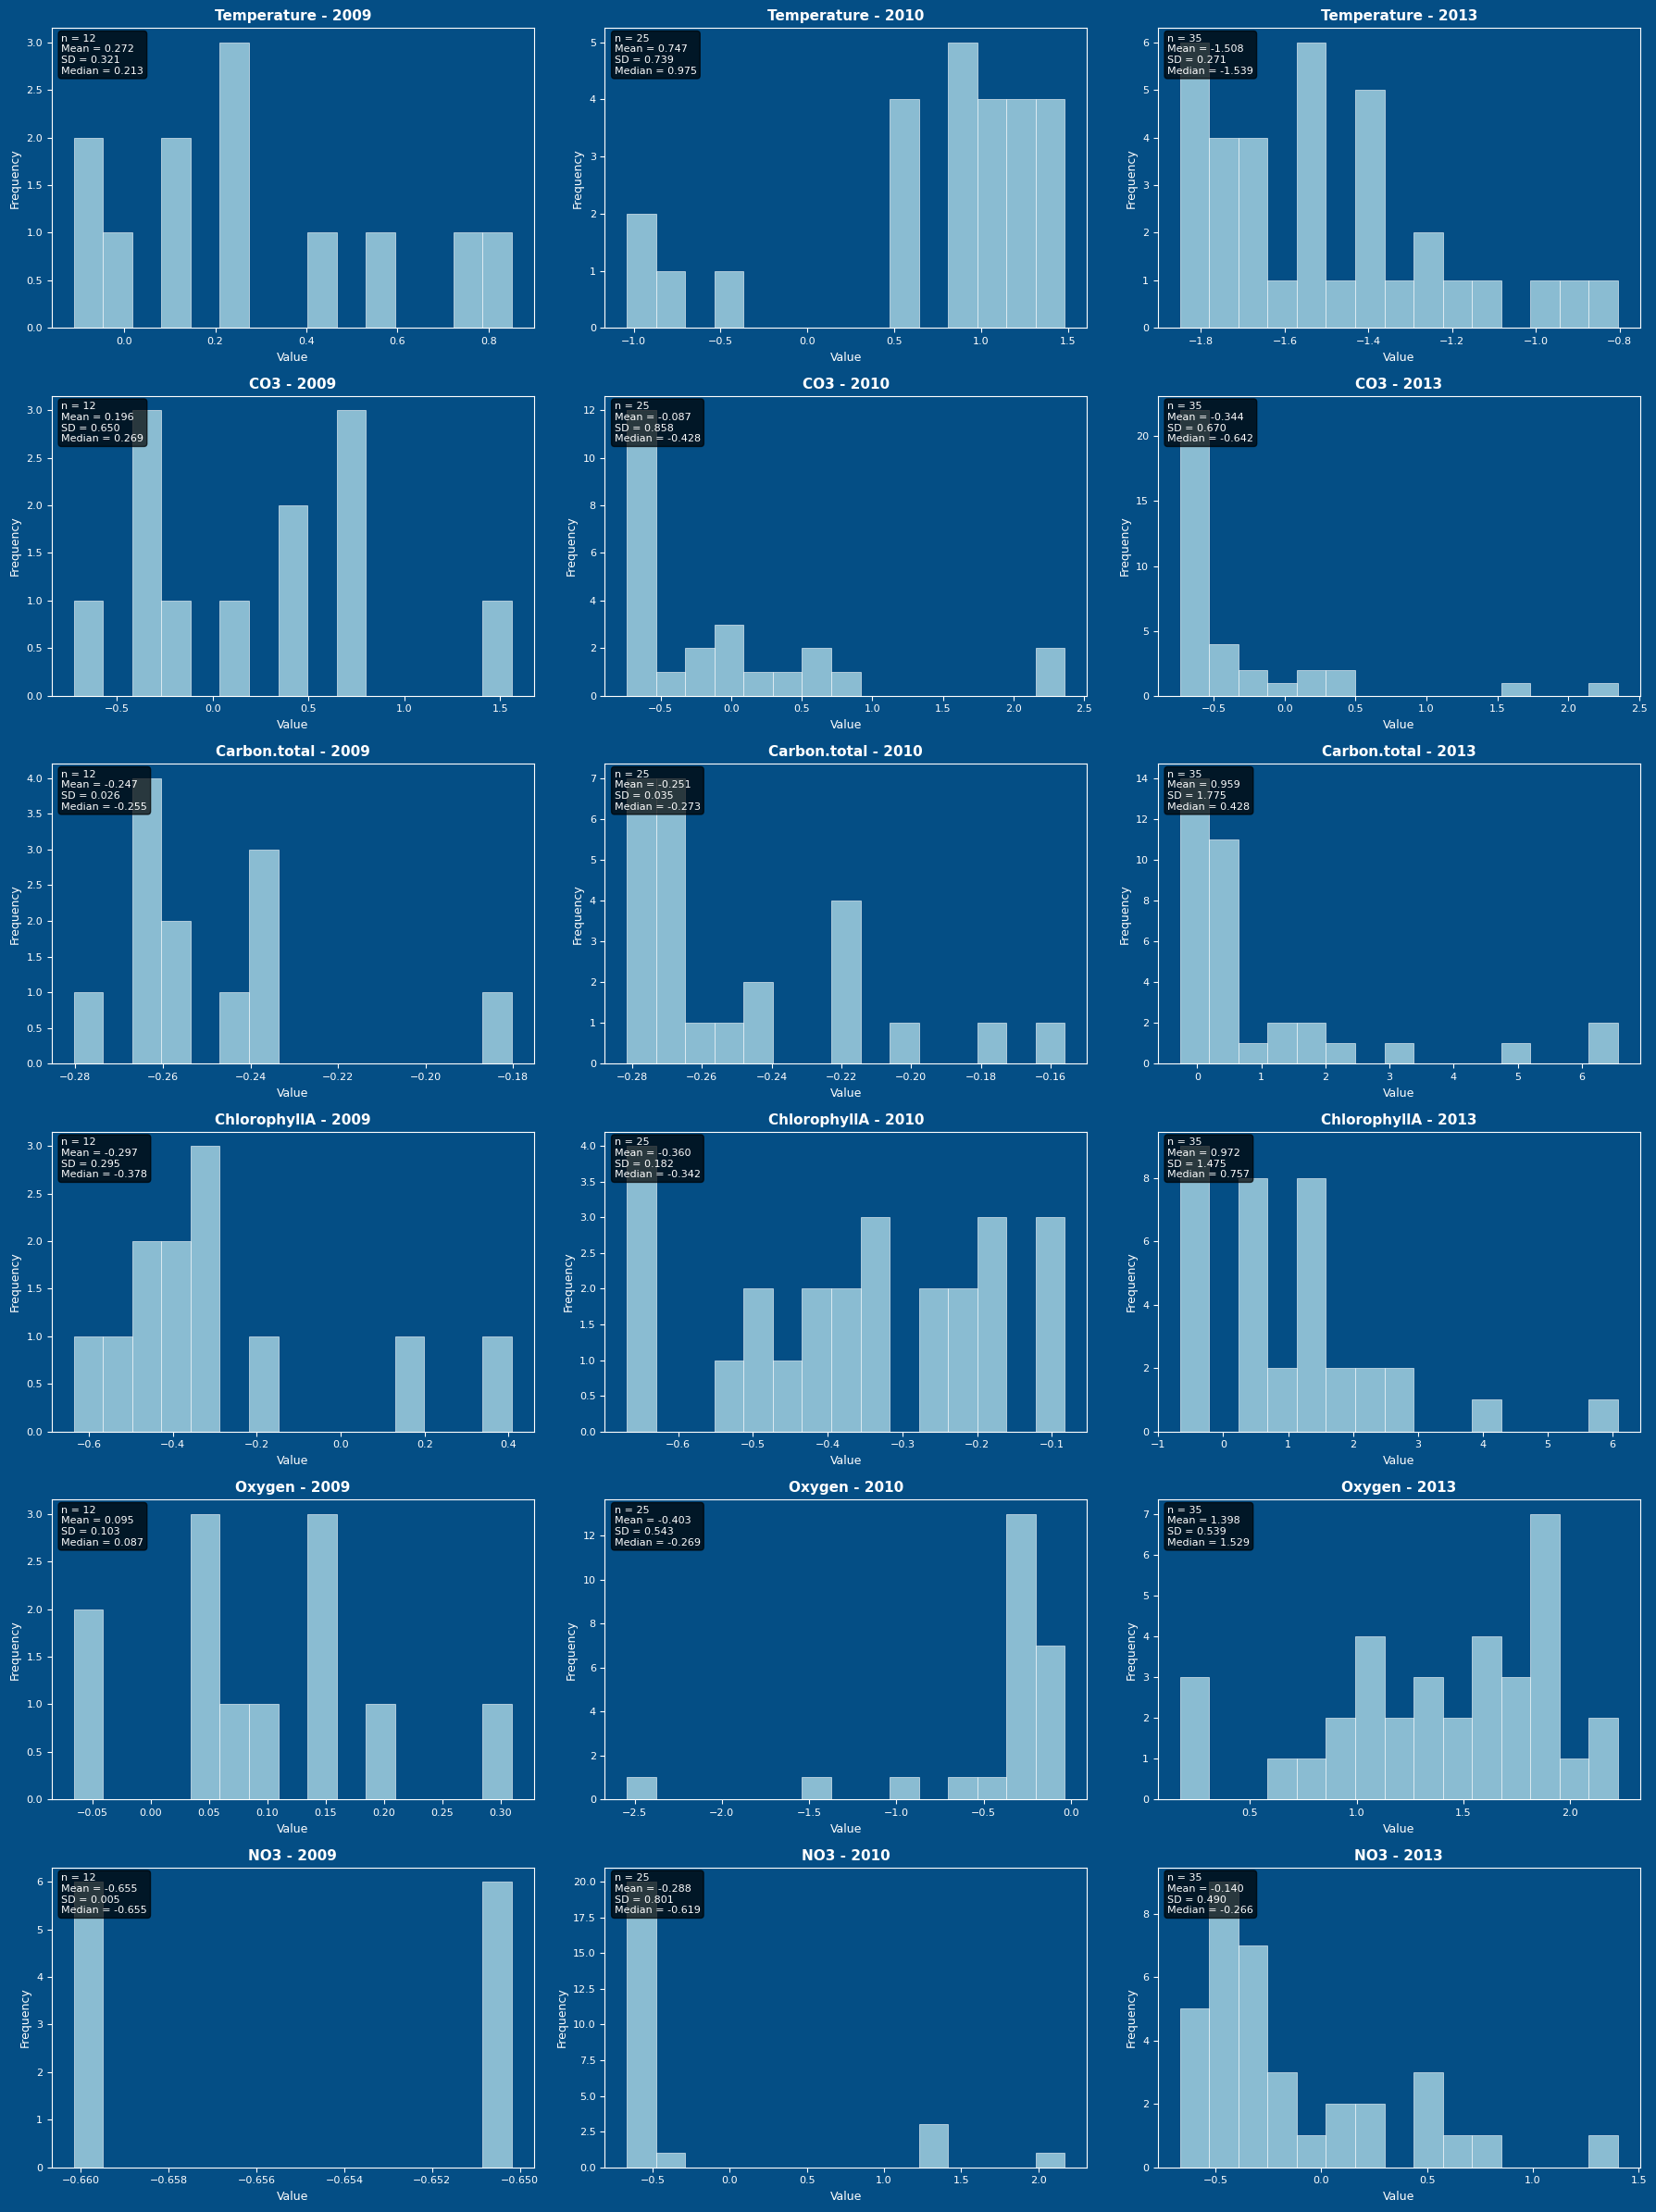


Carbon Pump Variables by Year - Summary:

Year 2009 (n = 12 samples):
------------------------------
       Temperature     CO3  Carbon.total  ChlorophyllA  Oxygen     NO3
count       12.000  12.000        12.000        12.000  12.000  12.000
mean         0.272   0.196        -0.247        -0.297   0.095  -0.655
std          0.321   0.650         0.026         0.295   0.103   0.005
min         -0.111  -0.723        -0.280        -0.636  -0.066  -0.660
25%          0.067  -0.398        -0.262        -0.456   0.057  -0.660
50%          0.213   0.269        -0.255        -0.378   0.087  -0.655
75%          0.460   0.650        -0.235        -0.304   0.135  -0.650
max          0.851   1.561        -0.180         0.408   0.310  -0.650

Year 2010 (n = 25 samples):
------------------------------
       Temperature     CO3  Carbon.total  ChlorophyllA  Oxygen     NO3
count       25.000  25.000        25.000        25.000  25.000  25.000
mean         0.747  -0.087        -0.251        -0.360  -

In [45]:
# Carbon pump variables histograms separated by year
carbon_pump_vars = [
    'Temperature',     # Controls metabolic rates and CO2 solubility
    'CO3',            # Carbonate ion concentration - key for calcification
    'Carbon.total',   # Total carbon content
    'ChlorophyllA',   # Primary productivity indicator
    'Oxygen',         # Respiration/photosynthesis balance
    'NO3'             # Nitrate - nutrient availability
]

# Check which variables exist in the dataset
available_vars = [var for var in carbon_pump_vars if var in df.columns]
print(f"Available carbon pump variables: {available_vars}")

# Get unique years
unique_years = sorted(df['Year'].unique())
print(f"Years in dataset: {unique_years}")

# Create subplots for each variable by year
fig, axes = plt.subplots(len(available_vars), len(unique_years), figsize=(6*len(unique_years), 4*len(available_vars)))
fig.patch.set_facecolor('#044E85')

# If only one year or one variable, ensure axes is 2D
if len(unique_years) == 1:
    axes = axes.reshape(-1, 1)
if len(available_vars) == 1:
    axes = axes.reshape(1, -1)

for i, var in enumerate(available_vars):
    for j, year in enumerate(unique_years):
        # Filter data for this year and variable
        year_data = df[df['Year'] == year][var].dropna()
        
        # Create histogram
        if len(year_data) > 0:
            axes[i, j].hist(year_data, bins=15, alpha=0.8, color='lightblue', 
                          edgecolor='white', linewidth=0.5)
            
            # Calculate statistics
            mean_val = year_data.mean()
            std_val = year_data.std()
            median_val = year_data.median()
            min_val = year_data.min()
            max_val = year_data.max()
            n_samples = len(year_data)
            
            # Style the subplot
            axes[i, j].set_facecolor('#044E85')
            axes[i, j].set_title(f'{var} - {year}', color='white', fontsize=11, fontweight='bold')
            axes[i, j].set_xlabel('Value', color='white', fontsize=9)
            axes[i, j].set_ylabel('Frequency', color='white', fontsize=9)
            axes[i, j].tick_params(colors='white', labelsize=8)
            
            # Add statistics text box
            stats_text = f'n = {n_samples}\nMean = {mean_val:.3f}\nSD = {std_val:.3f}\nMedian = {median_val:.3f}'
            axes[i, j].text(0.02, 0.98, stats_text, transform=axes[i, j].transAxes, 
                          verticalalignment='top', fontsize=8, color='white',
                          bbox=dict(boxstyle='round', facecolor='black', alpha=0.7))
        else:
            # No data for this year/variable combination
            axes[i, j].set_facecolor('#044E85')
            axes[i, j].set_title(f'{var} - {year}\n(No Data)', color='white', fontsize=11)
            axes[i, j].text(0.5, 0.5, 'No Data', transform=axes[i, j].transAxes,
                          ha='center', va='center', color='white', fontsize=12)
        
        # Style spines
        for spine in axes[i, j].spines.values():
            spine.set_color('white')

plt.tight_layout()
plt.show()

# Summary statistics by year
print("\nCarbon Pump Variables by Year - Summary:")
print("=" * 60)
for year in unique_years:
    year_df = df[df['Year'] == year]
    print(f"\nYear {year} (n = {len(year_df)} samples):")
    print("-" * 30)
    year_stats = year_df[available_vars].describe()
    print(year_stats.round(3))

Years in dataset: [np.int64(2009), np.int64(2010), np.int64(2013)]

Year 2009 - Monthly distribution:
  Sep: 4 samples
  Nov: 6 samples
  Dec: 2 samples

Year 2010 - Monthly distribution:
  Mar: 8 samples
  Apr: 4 samples
  May: 2 samples
  Jun: 4 samples
  Jul: 7 samples

Year 2013 - Monthly distribution:
  Jun: 5 samples
  Jul: 8 samples
  Aug: 5 samples
  Sep: 8 samples
  Oct: 9 samples


C:\Users\1\AppData\Local\Temp\ipykernel_13472\3132618553.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(month_labels, rotation=45)
C:\Users\1\AppData\Local\Temp\ipykernel_13472\3132618553.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(month_labels, rotation=45)
C:\Users\1\AppData\Local\Temp\ipykernel_13472\3132618553.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(month_labels, rotation=45)


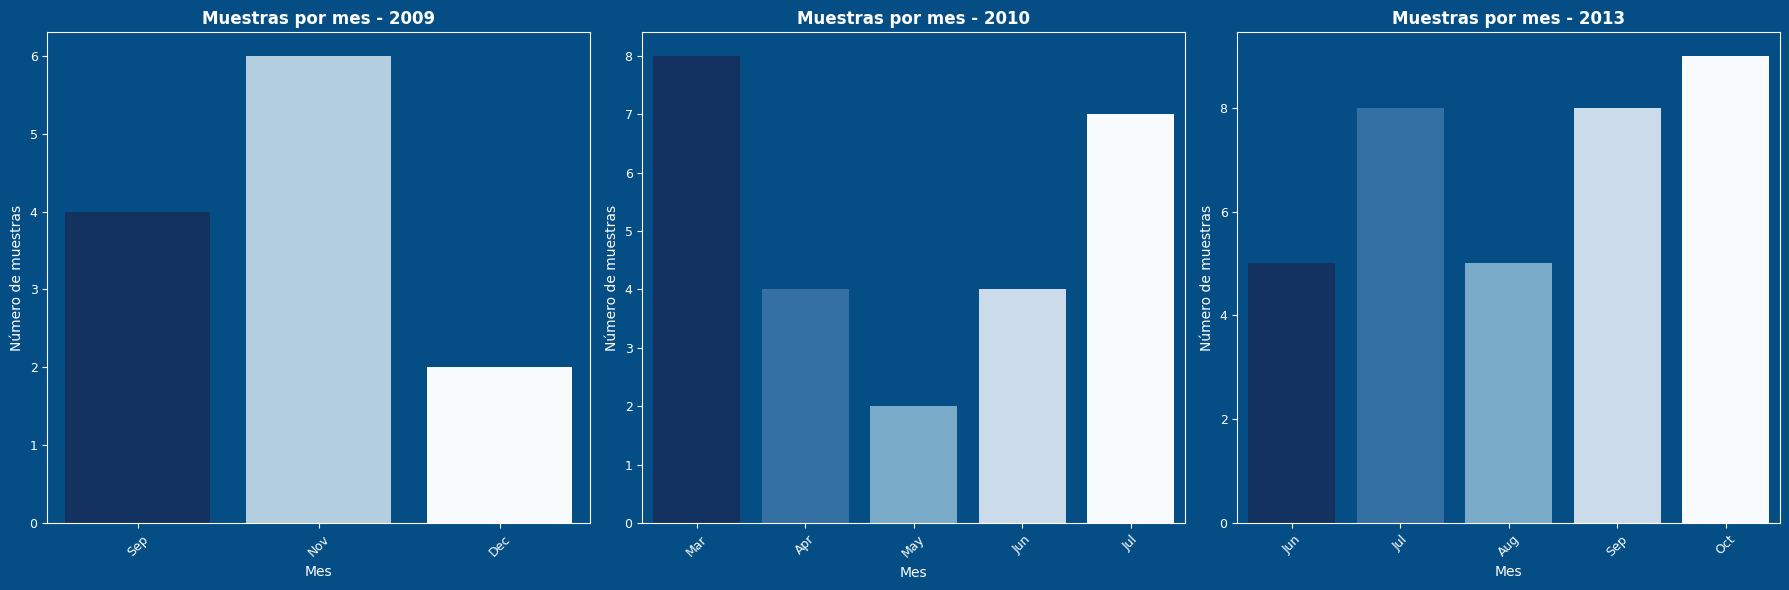


Sample Distribution by Year and Month:
      Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
Year                                                  
2009    0    0    0    0    0    0    4    0    6    2
2010    8    4    2    4    7    0    0    0    0    0
2013    0    0    0    5    8    5    8    9    0    0

Total samples per year:
  2009: 12 samples
  2010: 25 samples
  2013: 35 samples


In [47]:
# Create barplots showing samples by month for each year
# First, let's check if we have month data and extract it
if 'Date' in df.columns:
    # Convert Date to datetime if it's not already
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df['Month'] = df['Date'].dt.month
elif 'Month' in df.columns:
    # Use existing Month column
    pass
else:
    # Try to extract month from other date columns
    date_cols = [col for col in df.columns if 'date' in col.lower() or 'time' in col.lower()]
    print(f"Available date-related columns: {date_cols}")
    
    # For now, let's assume we can extract month from a date column
    # You may need to adjust this based on your actual date column name
    if date_cols:
        df['Date'] = pd.to_datetime(df[date_cols[0]], errors='coerce')
        df['Month'] = df['Date'].dt.month

# Get unique years
unique_years = sorted(df['Year'].unique())
print(f"Years in dataset: {unique_years}")

# Create month names for better labels
month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
               7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

# Create subplots - one for each year
fig, axes = plt.subplots(1, len(unique_years), figsize=(6*len(unique_years), 6))
fig.patch.set_facecolor('#044E85')

# If only one year, ensure axes is iterable
if len(unique_years) == 1:
    axes = [axes]

for i, year in enumerate(unique_years):
    # Filter data for this year
    year_data = df[df['Year'] == year]
    
    # Count samples by month
    if 'Month' in year_data.columns:
        month_counts = year_data['Month'].value_counts().sort_index()
        
        # Create month labels
        month_labels = [month_names.get(month, f'Month {month}') for month in month_counts.index]
        
        # Create barplot
        sns.barplot(x=month_counts.index, y=month_counts.values, 
                   hue=month_counts.index, ax=axes[i], palette="Blues_r", legend=False)
        
        # Style the subplot
        axes[i].set_facecolor('#044E85')
        axes[i].set_title(f'Muestras por mes - {year}', color='white', fontsize=12, fontweight='bold')
        axes[i].set_xlabel('Mes', color='white')
        axes[i].set_ylabel('Número de muestras', color='white')
        axes[i].tick_params(colors='white', labelsize=9)
        
        # Set month labels
        axes[i].set_xticklabels(month_labels, rotation=45)

        
        # Style spines
        for spine in axes[i].spines.values():
            spine.set_color('white')
            
        print(f"\nYear {year} - Monthly distribution:")
        for month, count in month_counts.items():
            print(f"  {month_names[month]}: {count} samples")
    else:
        # No month data available
        axes[i].set_facecolor('#044E85')
        axes[i].set_title(f'Muestras por mes - {year}\n(No Month Data)', color='white', fontsize=12)
        axes[i].text(0.5, 0.5, 'No Month Data Available', transform=axes[i].transAxes,
                    ha='center', va='center', color='white', fontsize=14)
        
        # Style spines
        for spine in axes[i].spines.values():
            spine.set_color('white')

plt.tight_layout()
plt.show()

# Summary table by year and month
if 'Month' in df.columns:
    print("\nSample Distribution by Year and Month:")
    print("=" * 50)
    monthly_summary = df.groupby(['Year', 'Month']).size().unstack(fill_value=0)
    monthly_summary.columns = [month_names[col] for col in monthly_summary.columns]
    print(monthly_summary)
    
    # Total samples per year
    print("\nTotal samples per year:")
    yearly_totals = df['Year'].value_counts().sort_index()
    for year, total in yearly_totals.items():
        print(f"  {year}: {total} samples")

Available carbon pump variables: ['Temperature', 'CO3', 'Carbon.total', 'ChlorophyllA', 'Oxygen', 'NO3']
Target gene K01895 found in dataset


C:\Users\1\AppData\Local\Temp\ipykernel_13472\2753382317.py:79: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.yaxis.set_ticklabels(cbar.ax.yaxis.get_ticklabels(), color='white')


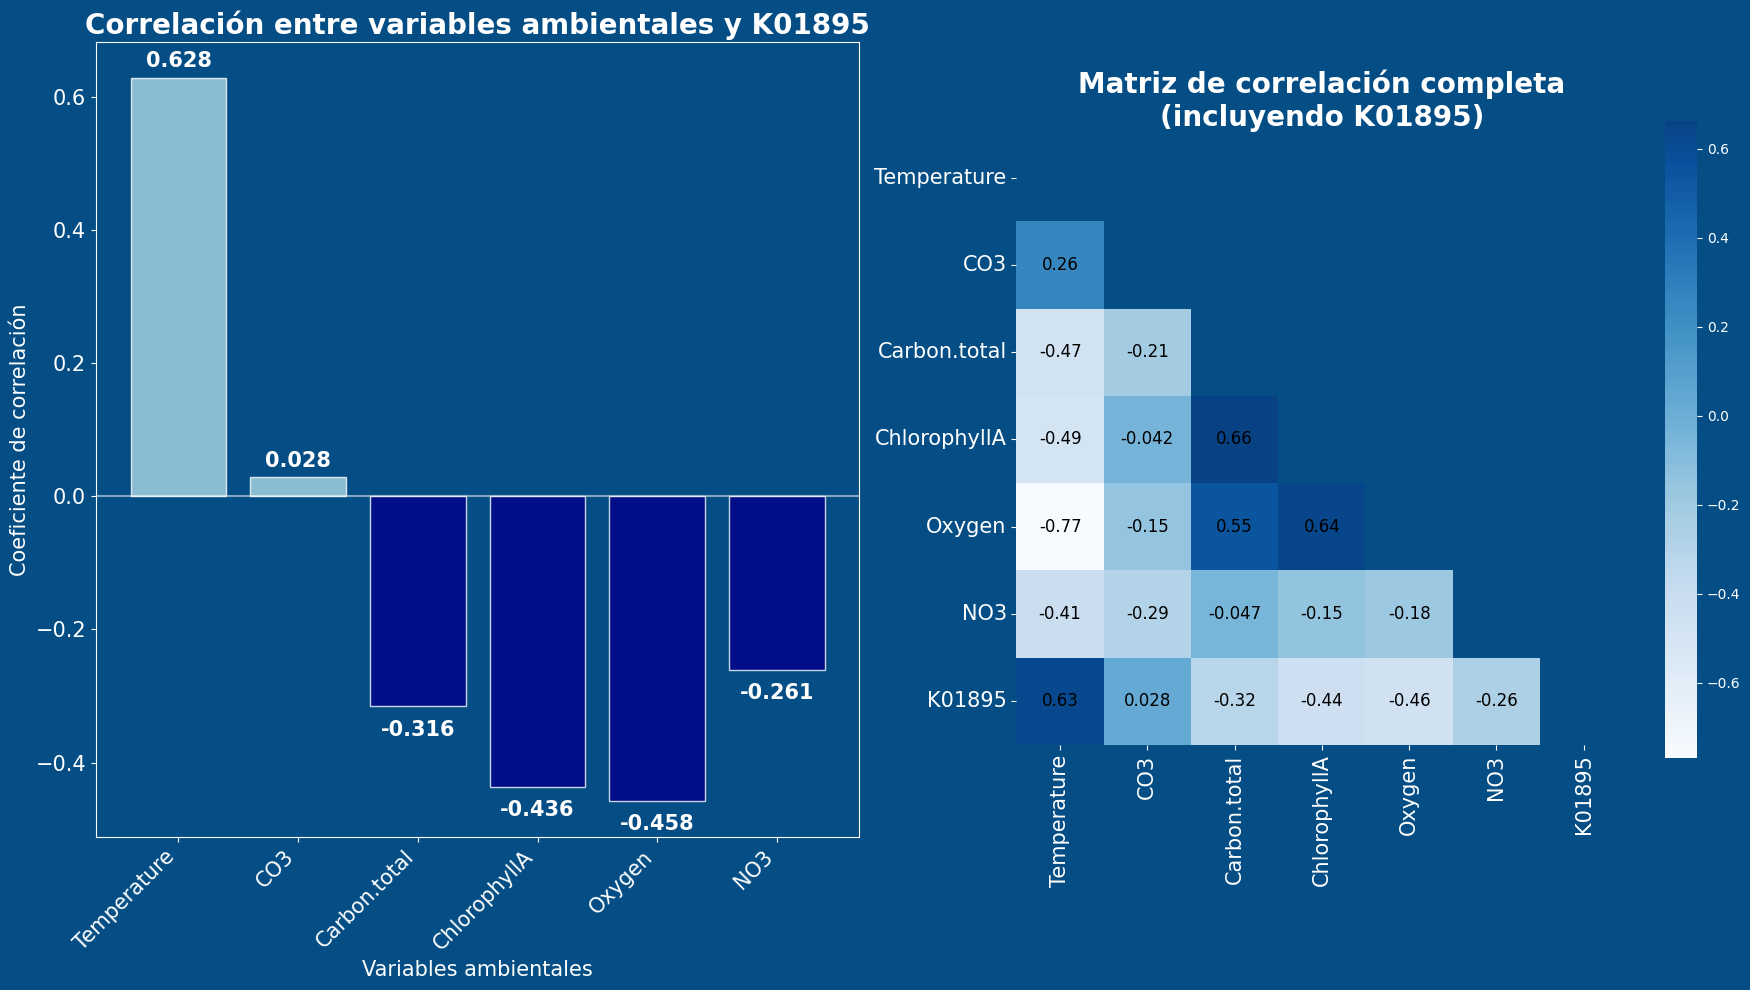


Correlations between environmental variables and K01895:
Temperature    :  0.6279 (Moderate positive)
Oxygen         : -0.4576 (Moderate negative)
ChlorophyllA   : -0.4360 (Moderate negative)
Carbon.total   : -0.3156 (Moderate negative)
NO3            : -0.2607 (Weak negative)
CO3            :  0.0283 (Weak positive)

Statistical Summary for K01895:
----------------------------------------
count    72.000000
mean      1.402993
std       0.155276
min       1.122633
25%       1.316996
50%       1.377140
75%       1.523754
max       1.827174
Name: K01895, dtype: float64


In [60]:

# Define the carbon pump variables and target gene
carbon_pump_vars = [
    'Temperature',     # Controls metabolic rates and CO2 solubility
    'CO3',            # Carbonate ion concentration - key for calcification
    'Carbon.total',   # Total carbon content
    'ChlorophyllA',   # Primary productivity indicator
    'Oxygen',         # Respiration/photosynthesis balance
    'NO3'             # Nitrate - nutrient availability
]

target_gene = 'K01895'

# Check which variables exist in the dataset
available_vars = [var for var in carbon_pump_vars if var in df.columns]
print(f"Available carbon pump variables: {available_vars}")

# Check if target gene exists
if target_gene in df.columns:
    print(f"Target gene {target_gene} found in dataset")
    
    # Create subset with available variables plus target gene
    correlation_vars = available_vars + [target_gene]
    
    # Convert to numeric and calculate correlations
    corr_data = df[correlation_vars].copy()
    for var in correlation_vars:
        corr_data[var] = pd.to_numeric(corr_data[var], errors='coerce')
    
    # Calculate correlation matrix
    correlation_matrix = corr_data.corr()
    
    # Extract correlations with K01895
    k01895_correlations = correlation_matrix[target_gene].drop(target_gene)
    
    # Create the correlation plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 10))
    fig.patch.set_facecolor('#044E85')
    
    # Left plot: Bar plot of correlations with K01895
    colors = ['darkblue' if x < 0 else 'lightblue' for x in k01895_correlations.values]
    bars = ax1.bar(range(len(k01895_correlations)), k01895_correlations.values, 
                   color=colors, alpha=0.8, edgecolor='white', linewidth=1)
    
    # Style the bar plot
    ax1.set_facecolor('#044E85')
    ax1.set_title(f'Correlación entre variables ambientales y {target_gene}', 
                  color='white', fontsize=20, fontweight='bold')
    ax1.set_xlabel('Variables ambientales', color='white', fontsize=15)
    ax1.set_ylabel('Coeficiente de correlación', color='white', fontsize=15)
    ax1.set_xticks(range(len(k01895_correlations)))
    ax1.set_xticklabels(k01895_correlations.index, rotation=45, ha='right')
    ax1.tick_params(colors='white', labelsize=15)
    ax1.axhline(y=0, color='white', linestyle='-', alpha=0.5)
    
    # Add correlation values on bars
    for i, (var, corr_val) in enumerate(k01895_correlations.items()):
        ax1.text(i, corr_val + (0.01 if corr_val >= 0 else -0.02), f'{corr_val:.3f}', 
                ha='center', va='bottom' if corr_val >= 0 else 'top', 
                color='white', fontsize=15, fontweight='bold')
    
    # Style spines
    for spine in ax1.spines.values():
        spine.set_color('white')
    
    # Right plot: Heatmap of full correlation matrix
    mask = np.triu(np.ones_like(correlation_matrix))
    sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='Blues', center=0,
                square=True, cbar_kws={"shrink": .8}, ax=ax2,
                annot_kws={'color': 'black', 'fontsize': 12})
    
    ax2.set_facecolor('#044E85')
    ax2.set_title(f'Matriz de correlación completa\n(incluyendo {target_gene})', 
                  color='white', fontsize=20, fontweight='bold')
    ax2.tick_params(colors='white', labelsize=15)
    
    # Style the colorbar
    cbar = ax2.collections[0].colorbar
    cbar.ax.yaxis.set_tick_params(color='white')
    cbar.ax.yaxis.set_ticklabels(cbar.ax.yaxis.get_ticklabels(), color='white')
    
    plt.tight_layout()
    plt.show()
    
    # Print correlation summary
    print(f"\nCorrelations between environmental variables and {target_gene}:")
    print("=" * 65)
    for var, corr_val in k01895_correlations.sort_values(key=abs, ascending=False).items():
        strength = "Strong" if abs(corr_val) > 0.7 else "Moderate" if abs(corr_val) > 0.3 else "Weak"
        direction = "positive" if corr_val > 0 else "negative"
        print(f"{var:15s}: {corr_val:7.4f} ({strength} {direction})")
    
    # Additional statistical information
    print(f"\nStatistical Summary for {target_gene}:")
    print("-" * 40)
    gene_stats = df[target_gene].describe()
    print(gene_stats)
    
else:
    print(f"Target gene {target_gene} not found in dataset")
    print("Available KEGG genes (first 20):")
    kegg_genes = [col for col in df.columns if col.startswith('K')]
    print(kegg_genes[:20])